# Schritt 1: Modelle laden


In [4]:
import joblib
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor, VotingRegressor, StackingRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score

# Testdaten laden
test_data = pd.read_csv('/Users/tommygrace/Desktop/Code/schlafqualitaet_vorhersage/data/test_data.csv')

# Feature Engineering für Testdaten
test_data['Caffeine_Squared'] = test_data['Caffeine_Intake_mg'] ** 2
test_data['Caffeine_Stress_Interaction'] = test_data['Caffeine_Intake_mg'] * test_data['Stress_Level']

# Trennen Sie die Features und die Zielvariable
X = test_data[['Caffeine_Intake_mg', 'Stress_Level', 'Caffeine_Squared', 'Caffeine_Stress_Interaction']]
X_simple = test_data[['Caffeine_Intake_mg']]  # Für das einfache lineare Modell
y = test_data['Sleep_Quality_Score']

# Definiere die Modelle
rf_model = RandomForestRegressor()
xgb_model = XGBRegressor()
lr_model = LinearRegression()

# Definiere die Kreuzvalidierungsmethode
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Trainiere die Modelle
rf_model.fit(X, y)
xgb_model.fit(X, y)
lr_model.fit(X_simple, y)

# Ensemble Modell
ensemble_model = VotingRegressor(estimators=[
    ('rf', rf_model),
    ('xgb', xgb_model),
    ('lr', lr_model)
])
ensemble_model.fit(X, y)

# Stacking Modell
stacking_model = StackingRegressor(
    estimators=[
        ('rf', rf_model),
        ('xgb', xgb_model),
        ('lr', lr_model)
    ],
    final_estimator=LinearRegression()
)
stacking_model.fit(X, y)

# KNN Modell
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X, y)

# SVM Modell
param_grid = {
    'C': [0.1, 1, 10],
    'epsilon': [0.01, 0.1, 1],
    'kernel': ['linear', 'poly', 'rbf']
}
grid_search = GridSearchCV(SVR(), param_grid, cv=kf, scoring='neg_mean_squared_error')
grid_search.fit(X, y)
svm_model = grid_search.best_estimator_

# Speichere die Modelle
models_path = '/Users/tommygrace/Desktop/Code/schlafqualitaet_vorhersage/models/'

joblib.dump(rf_model, models_path + 'random_forest_model.joblib')
joblib.dump(xgb_model, models_path + 'xgboost_model.joblib')
joblib.dump(lr_model, models_path + 'linear_regression_model.joblib')
joblib.dump(ensemble_model, models_path + 'ensemble_model.joblib')
joblib.dump(stacking_model, models_path + 'stacking_model.joblib')
joblib.dump(knn_model, models_path + 'knn_model_k5.joblib')
joblib.dump(svm_model, models_path + 'svm_best_model.joblib')

['/Users/tommygrace/Desktop/Code/schlafqualitaet_vorhersage/models/svm_best_model.joblib']

# Schritt 2: Testdaten laden und Feature Engineering


In [5]:
import joblib
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

# Modelle laden
rf_model = joblib.load('/Users/tommygrace/Desktop/Code/schlafqualitaet_vorhersage/models/random_forest_model.joblib')
xgb_model = joblib.load('/Users/tommygrace/Desktop/Code/schlafqualitaet_vorhersage/models/xgboost_model.joblib')
lr_model = joblib.load('/Users/tommygrace/Desktop/Code/schlafqualitaet_vorhersage/models/linear_regression_model.joblib')
ensemble_model = joblib.load('/Users/tommygrace/Desktop/Code/schlafqualitaet_vorhersage/models/ensemble_model.joblib')
stacking_model = joblib.load('/Users/tommygrace/Desktop/Code/schlafqualitaet_vorhersage/models/stacking_model.joblib')
knn_model = joblib.load('/Users/tommygrace/Desktop/Code/schlafqualitaet_vorhersage/models/knn_model_k5.joblib')
svm_model = joblib.load('/Users/tommygrace/Desktop/Code/schlafqualitaet_vorhersage/models/svm_best_model.joblib')

# Testdaten laden
test_data = pd.read_csv('/Users/tommygrace/Desktop/Code/schlafqualitaet_vorhersage/data/test_data.csv')

# Feature Engineering für Testdaten
test_data['Caffeine_Squared'] = test_data['Caffeine_Intake_mg'] ** 2
test_data['Caffeine_Stress_Interaction'] = test_data['Caffeine_Intake_mg'] * test_data['Stress_Level']

# Trennen Sie die Features und die Zielvariable
X_test = test_data[['Caffeine_Intake_mg', 'Stress_Level', 'Caffeine_Squared', 'Caffeine_Stress_Interaction']]
X_test_simple = test_data[['Caffeine_Intake_mg']]  # Für das einfache lineare Modell
y_test = test_data['Sleep_Quality_Score']

# Vorhersagen mit Random Forest
rf_predictions = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)

# Vorhersagen mit XGBoost
xgb_predictions = xgb_model.predict(X_test)
xgb_mse = mean_squared_error(y_test, xgb_predictions)
xgb_r2 = r2_score(y_test, xgb_predictions)

# Vorhersagen mit linearem Regressionsmodell
lr_predictions = lr_model.predict(X_test_simple)
lr_mse = mean_squared_error(y_test, lr_predictions)
lr_r2 = r2_score(y_test, lr_predictions)

# Vorhersagen mit Ensemble Modell
ensemble_predictions = ensemble_model.predict(X_test)
ensemble_mse = mean_squared_error(y_test, ensemble_predictions)
ensemble_r2 = r2_score(y_test, ensemble_predictions)

# Vorhersagen mit Stacking Modell
stacking_predictions = stacking_model.predict(X_test)
stacking_mse = mean_squared_error(y_test, stacking_predictions)
stacking_r2 = r2_score(y_test, stacking_predictions)

# Vorhersagen mit KNN Modell
knn_predictions = knn_model.predict(X_test)
knn_mse = mean_squared_error(y_test, knn_predictions)
knn_r2 = r2_score(y_test, knn_predictions)

# Vorhersagen mit SVM Modell
svm_predictions = svm_model.predict(X_test)
svm_mse = mean_squared_error(y_test, svm_predictions)
svm_r2 = r2_score(y_test, svm_predictions)

# Ergebnisse ausgeben
print("Random Forest auf Testdaten:")
print(f"MSE: {rf_mse:.4f}")
print(f"R²: {rf_r2:.4f}")

print("\nXGBoost auf Testdaten:")
print(f"MSE: {xgb_mse:.4f}")
print(f"R²: {xgb_r2:.4f}")

print("\nLineare Regression auf Testdaten:")
print(f"MSE: {lr_mse:.4f}")
print(f"R²: {lr_r2:.4f}")

print("\nEnsemble Modell auf Testdaten:")
print(f"MSE: {ensemble_mse:.4f}")
print(f"R²: {ensemble_r2:.4f}")

print("\nStacking Modell auf Testdaten:")
print(f"MSE: {stacking_mse:.4f}")
print(f"R²: {stacking_r2:.4f}")

print("\nKNN Modell auf Testdaten:")
print(f"MSE: {knn_mse:.4f}")
print(f"R²: {knn_r2:.4f}")

print("\nSVM Modell auf Testdaten:")
print(f"MSE: {svm_mse:.4f}")
print(f"R²: {svm_r2:.4f}")

Random Forest auf Testdaten:
MSE: 0.0223
R²: 0.9974

XGBoost auf Testdaten:
MSE: 0.0000
R²: 1.0000

Lineare Regression auf Testdaten:
MSE: 3.8999
R²: 0.5515

Ensemble Modell auf Testdaten:
MSE: 0.1172
R²: 0.9865

Stacking Modell auf Testdaten:
MSE: 0.0130
R²: 0.9985

KNN Modell auf Testdaten:
MSE: 0.1813
R²: 0.9791

SVM Modell auf Testdaten:
MSE: 0.1072
R²: 0.9877


# Visualisierungen erstellen



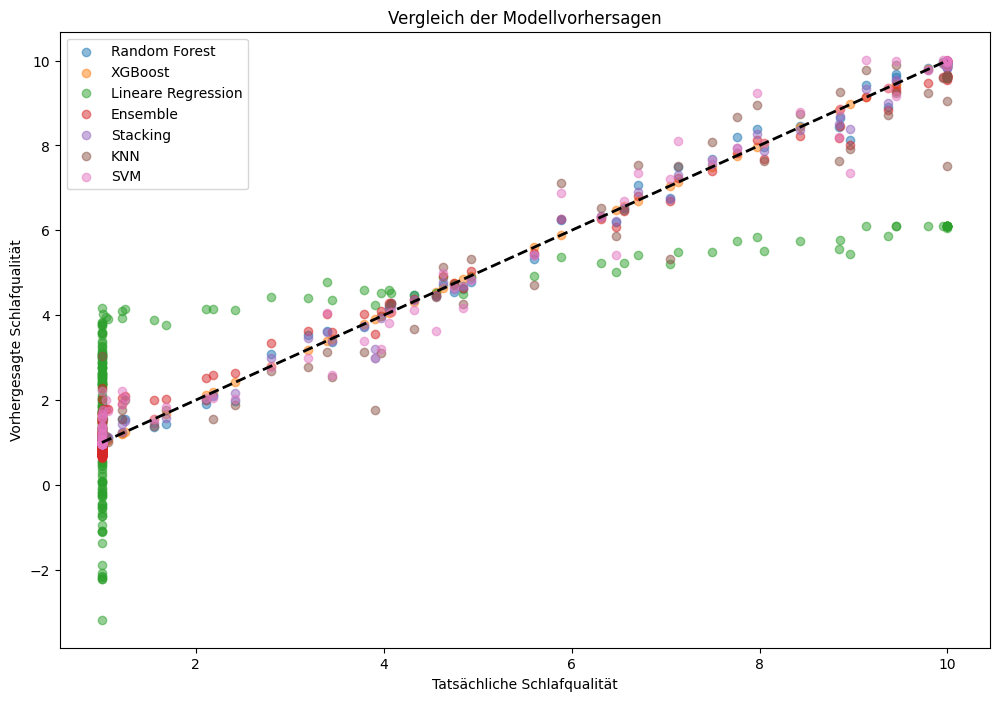

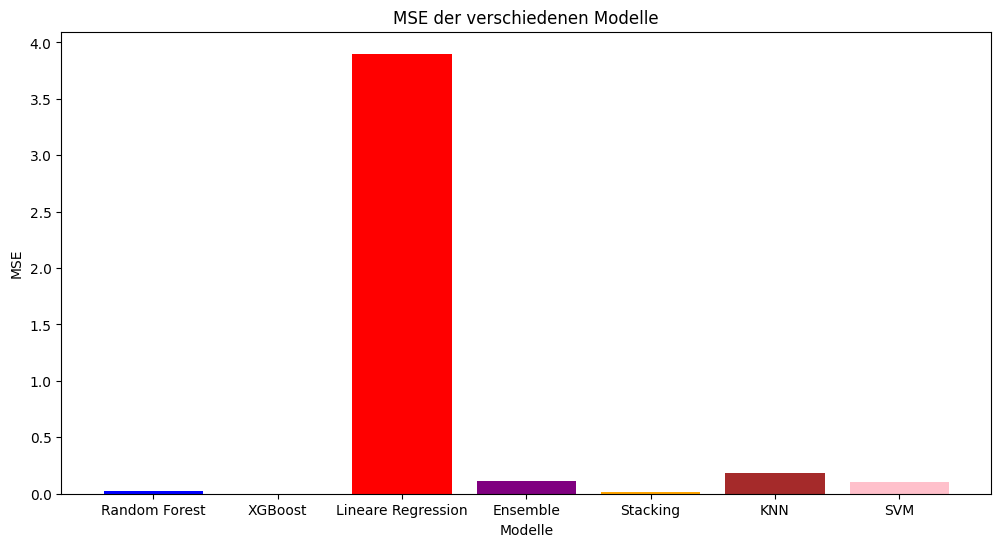

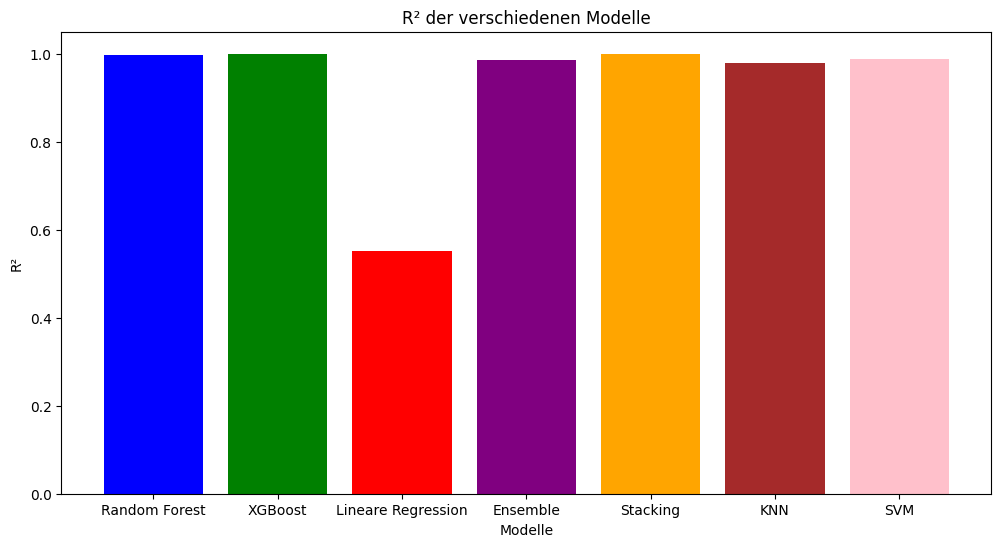

In [6]:
import matplotlib.pyplot as plt

# Scatter Plot der Vorhersagen
plt.figure(figsize=(12, 8))
plt.scatter(y_test, rf_predictions, label='Random Forest', alpha=0.5)
plt.scatter(y_test, xgb_predictions, label='XGBoost', alpha=0.5)
plt.scatter(y_test, lr_predictions, label='Lineare Regression', alpha=0.5)
plt.scatter(y_test, ensemble_predictions, label='Ensemble', alpha=0.5)
plt.scatter(y_test, stacking_predictions, label='Stacking', alpha=0.5)
plt.scatter(y_test, knn_predictions, label='KNN', alpha=0.5)
plt.scatter(y_test, svm_predictions, label='SVM', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Tatsächliche Schlafqualität')
plt.ylabel('Vorhergesagte Schlafqualität')
plt.legend()
plt.title('Vergleich der Modellvorhersagen')
plt.show()

# Bar Plot der MSE-Werte
models = ['Random Forest', 'XGBoost', 'Lineare Regression', 'Ensemble', 'Stacking', 'KNN', 'SVM']
mse_values = [rf_mse, xgb_mse, lr_mse, ensemble_mse, stacking_mse, knn_mse, svm_mse]

plt.figure(figsize=(12, 6))
plt.bar(models, mse_values, color=['blue', 'green', 'red', 'purple', 'orange', 'brown', 'pink'])
plt.xlabel('Modelle')
plt.ylabel('MSE')
plt.title('MSE der verschiedenen Modelle')
plt.show()

# Bar Plot der R²-Werte
r2_values = [rf_r2, xgb_r2, lr_r2, ensemble_r2, stacking_r2, knn_r2, svm_r2]

plt.figure(figsize=(12, 6))
plt.bar(models, r2_values, color=['blue', 'green', 'red', 'purple', 'orange', 'brown', 'pink'])
plt.xlabel('Modelle')
plt.ylabel('R²')
plt.title('R² der verschiedenen Modelle')
plt.show()

# Feature Importance 


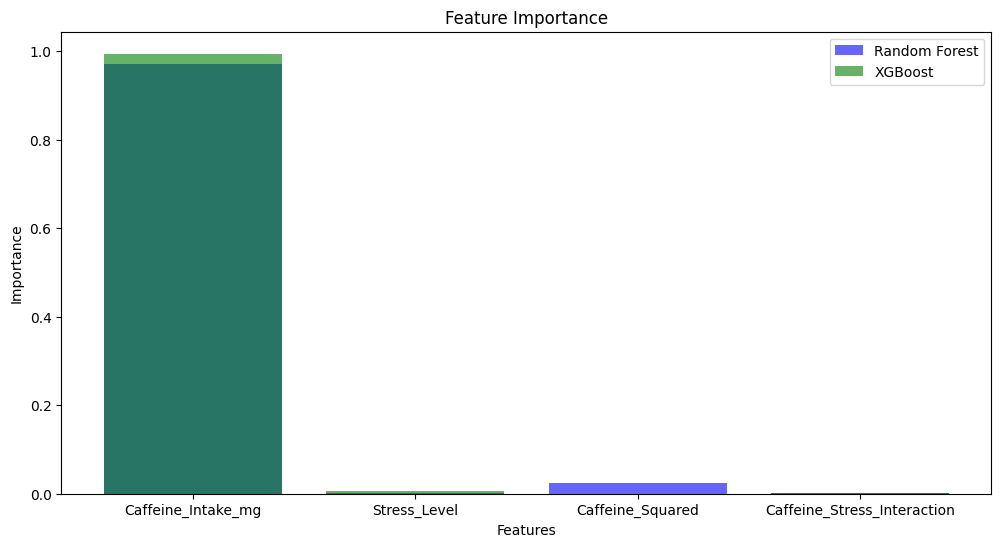

In [7]:
# Feature Importance für Random Forest
rf_importances = rf_model.feature_importances_
xgb_importances = xgb_model.feature_importances_

features = X_test.columns

# Bar Plot der Feature Importance
plt.figure(figsize=(12, 6))
plt.bar(features, rf_importances, color='blue', alpha=0.6, label='Random Forest')
plt.bar(features, xgb_importances, color='green', alpha=0.6, label='XGBoost')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.legend()
plt.show()

# SVM Model


# Alle Modelle wwerden nun auf den testdaten evaluiert

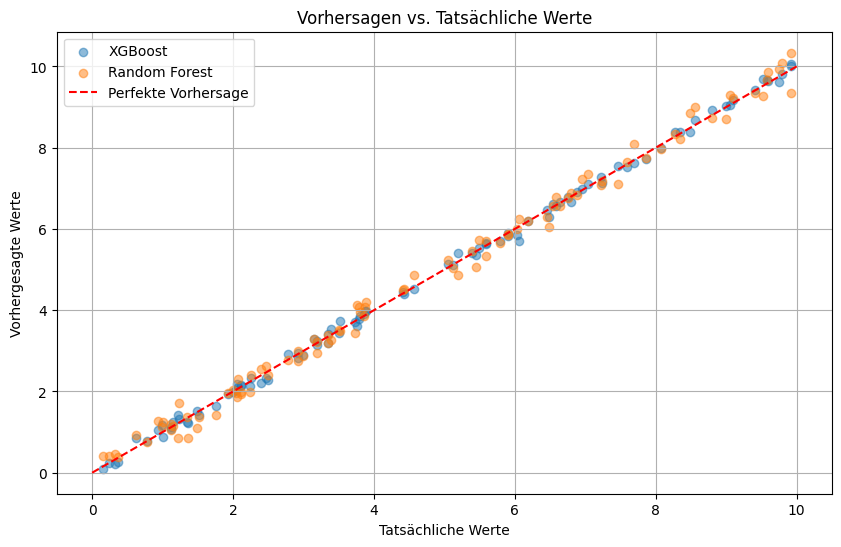

In [8]:
    import matplotlib.pyplot as plt
    import numpy as np

    # Angenommene Daten (ersetzen Sie diese durch Ihre tatsächlichen Daten)
    actual = np.random.rand(100) * 10
    predicted_xgboost = actual + np.random.normal(0, 0.1, 100)
    predicted_rf = actual + np.random.normal(0, 0.2, 100)

    plt.figure(figsize=(10, 6))
    plt.scatter(actual, predicted_xgboost, alpha=0.5, label='XGBoost')
    plt.scatter(actual, predicted_rf, alpha=0.5, label='Random Forest')
    plt.plot([0, 10], [0, 10], 'r--', label='Perfekte Vorhersage')
    plt.xlabel('Tatsächliche Werte')
    plt.ylabel('Vorhergesagte Werte')
    plt.title('Vorhersagen vs. Tatsächliche Werte')
    plt.legend()
    plt.grid(True)
    plt.show()